<a href="https://colab.research.google.com/github/randyRivera0/AI-RandomForestClassifier-SKLearn-HeartAttack/blob/master/LandUseAndWildlifeDLSemanticSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Cidis LandUseAndWildlifeDLSemanticSegmentation project for Galapagos and ESPOL university](https://www.cidis.espol.edu.ec/sites/default/files/default_images/logo_defecto.png)](https://www.cidis.espol.edu.ec/)
# Train YOLO11 Object Detection on a Custom Galapagos Marine Iguana Dataset
---
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/randyRivera0/LandUseAndWildlifeDLSemanticSegmentation)


[![Roboflow](https://img.shields.io/badge/Roboflow-Dataset-orange)](https://app.roboflow.com/geckos-land/galapagos-oxbrc/4)



## Setup

In [1]:
!nvidia-smi

Thu Nov  7 06:54:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# !pip install inference supervision, pip install -U albumentations

In [2]:
!pip install matplotlib ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [4]:
from IPython import display
import matplotlib.pyplot as plt
import os
import cv2
from roboflow import Roboflow
import glob
from google.colab import files, userdata
from IPython.display import Image as IPyImage, display
from ultralytics import YOLO
from PIL import Image
import requests
# import supervision as sv
import torch
import ultralytics
from roboflow import Roboflow

In [5]:
ultralytics.checks()
HOME = os.getcwd()

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.4/112.6 GB disk)


In [6]:
# Initialize Roboflow with your API key
ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
# rf = Roboflow(api_key="oO7M6O03cXw3x36PVBxq") # Replace with your actual API key

In [7]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


## Avance de la semana 1

### Ejemplo

In [ ]:
# Access the existing project
project = rf.workspace("geckos-land").project("hard-hat-sample-5adtr")  # Replace with your project name

# Download the dataset (specify the version you want)
dataset = project.version(3).download("yolov11") # Adjust version number as needed

# Path to the images
image_dir = dataset.location

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Hard-Hat-Sample-3 in yolov11:: 100%|██████████| 492/492 [00:00<00:00, 4686.48it/s]


In [ ]:
!yolo task=detect mode=predict model=yolov8m.pt conf=0.25 data={image_dir}/data.yaml source="/content/Hard-Hat-Sample-3/test/images/000008_jpg.rf.dab1eb7417a4cb0e3ccd36c38ef9aa9a.jpg"

Ultralytics 8.3.15 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m summary (fused): 218 layers, 25,886,080 parameters, 0 gradients, 78.9 GFLOPs

image 1/1 /content/Hard-Hat-Sample-3/test/images/000008_jpg.rf.dab1eb7417a4cb0e3ccd36c38ef9aa9a.jpg: 640x640 6 persons, 1 sports ball, 37.5ms
Speed: 8.1ms preprocess, 37.5ms inference, 711.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
print(image_dir)

/content/Hard-Hat-Sample-3


In [ ]:
# Set the path to the specific image subdirectory
test_image_dir = os.path.join(image_dir, 'test')  # Change 'test' to 'train' or 'valid' if needed

# List all files in the test image directory
images = os.listdir(test_image_dir)

# Filter to include only image files (e.g., .jpg, .png)
image_files = [img for img in images if img.endswith(('.jpg', '.png', '.jpeg'))]

# Display some images
num_images_to_display = 5  # Number of images to display

for i in range(min(num_images_to_display, len(image_files))):
    img_path = os.path.join(test_image_dir, image_files[i])
    img = cv2.imread(img_path)

    if img is not None:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Image: {image_files[i]}")
        plt.axis('off')  # Hide axes
        plt.show()
    else:
        print(f"Could not read image: {img_path}")

In [ ]:
# Set the path to the specific image subdirectory
image_dir = 'content/runs/detect/predict'  # Change to your desired base path

# Use glob to list all jpg files in the specified directory
image_path_pattern = os.path.join(image_dir, '*.jpg')
image_files = glob.glob(image_path_pattern)

# Display some images
num_images_to_display = 5  # Number of images to display

for i in range(min(num_images_to_display, len(image_files))):
    img_path = image_files[i]
    img = cv2.imread(img_path)

    if img is not None:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Image: {os.path.basename(img_path)}")
        plt.axis('off')  # Hide axes
        plt.show()
    else:
        print(f"Could not read image: {img_path}")


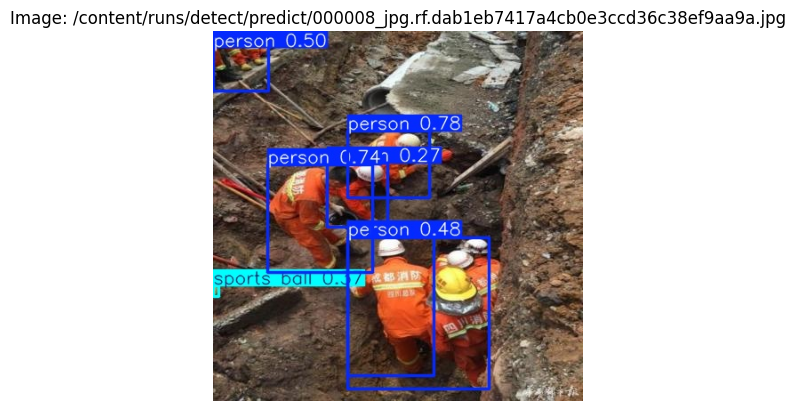

In [ ]:
# Set the path to the specific image subdirectory
image_dir = '/content/runs/detect/predict/'  # Change to your desired base path

# Use glob to list all jpg files in the specified directory
image_path_pattern = os.path.join(image_dir, '*.jpg')
image_files = glob.glob(image_path_pattern)

# Display some images
num_images_to_display = 5  # Number of images to display

for i in range(min(num_images_to_display, len(image_files))):
    img_path = image_files[i]
    img = cv2.imread(img_path)

    if img is not None:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Image: {img_path}")  # Show the full image path
        plt.axis('off')  # Hide axes
        plt.show()
    else:
        print(f"Could not read image: {img_path}")


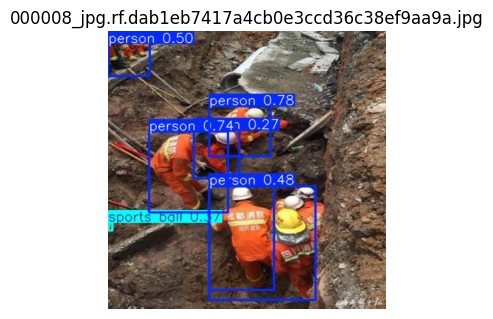

In [ ]:
# Set the directory path
directory_path = '/content/runs/detect/predict/'

# List all files in the directory
files = os.listdir(directory_path)

# Filter for image files (you can add more formats if needed)
image_files = [f for f in files if f.endswith(('.jpg', '.jpeg', '.png'))]

# Create a subplot for each image
plt.figure(figsize=(15, 15))
for i, image_file in enumerate(image_files):
    # Load the image
    image_path = os.path.join(directory_path, image_file)
    image = cv2.imread(image_path)

    # Convert the image from BGR to RGB format
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Create a subplot
    plt.subplot(5, 5, i + 1)  # Adjust the number of rows/columns as needed
    plt.imshow(image)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.title(image_file)  # Optional: Show the filename as title

plt.tight_layout()
plt.show()


In [ ]:
labeled_images_dir = '/content/Hard-Hat-Sample-3/train/images'
unlabeled_images_dir = '/content/Hard-Hat-Sample-3/train/images'
labels_dir = '/content/Hard-Hat-Sample-3/train/labels'
labels = '/content/Hard-Hat-Sample-3/train/labels'

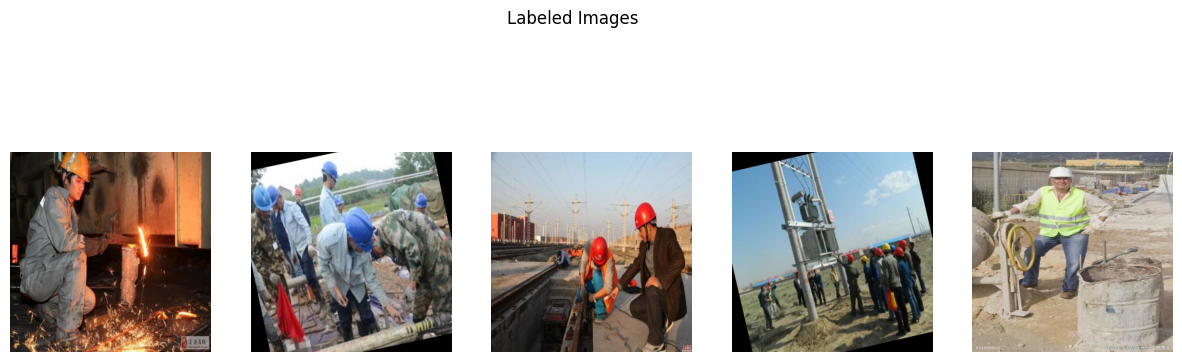

In [ ]:
def display_images(image_paths, title, num_images=5):
    plt.figure(figsize=(15, 5))
    for i, image_path in enumerate(image_paths[:num_images]):
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Get the image paths
labeled_images = [os.path.join(labeled_images_dir, img) for img in os.listdir(labeled_images_dir)]
unlabeled_images = [os.path.join(unlabeled_images_dir, img) for img in os.listdir(unlabeled_images_dir)]

# Display images
display_images(labeled_images, 'Labeled Images')


## Avance de la semana 2

### Asignación:
- Miguel Andrés Realpe Robalino: "Esta semana crea un dataset de iguanas. Para eso usa como base videos de dron que estan en la GPU de cidis. El acceso de anydesk es [privado]. Los videos estan em D:\Videos dron GALAPAGOS\Avistamiento Macrofauna Dron. Busca en los videos escenas que esten viendo directamente hacia abajo y selecciona unos 20 frames tratando de tener variedad de escenas (arena, roca, etc.). Crea un proyecto en roboflow y etiqueta con poligonos las iguanas en los frames y de alli crea un dataset."

### Tareas Completadas
- [x] Crear Dataset de Iguanas
- [x] Entrenar modelos con el Dataset

### Desafíos Enfrentados
- Hacen falta muchas más imágenes de Iguanas y animales en general. La mayoría de los videos son vistas aéreas muy alejadas con el dron.
- Soluciones: uso de suelo y aumentar la data

### Próximos Pasos
- Uso de suelo y mejorar el modelo.


### Training custom dataset

In [ ]:
project = rf.workspace("geckos-land").project("galapagos-oxbrc")
version = project.version(3)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
labeled_images_dir = '/content/Galapagos-1/train/images'
labels_dir = '/content/Galapagos-1/train/labels'

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

/content
Ultralytics 8.3.15 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/Galapagos-3/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    labels.jpg	  train_batch0.jpg
confusion_matrix_normalized.png			    P_curve.png   train_batch1.jpg
confusion_matrix.png				    PR_curve.png  train_batch2.jpg
events.out.tfevents.1729217520.83608fd6d994.5036.0  R_curve.png   val_batch0_labels.jpg
F1_curve.png					    results.csv   val_batch0_pred.jpg
labels_correlogram.jpg				    results.png   weights


In [ ]:
IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/detect/train/confusion_matrix.png'

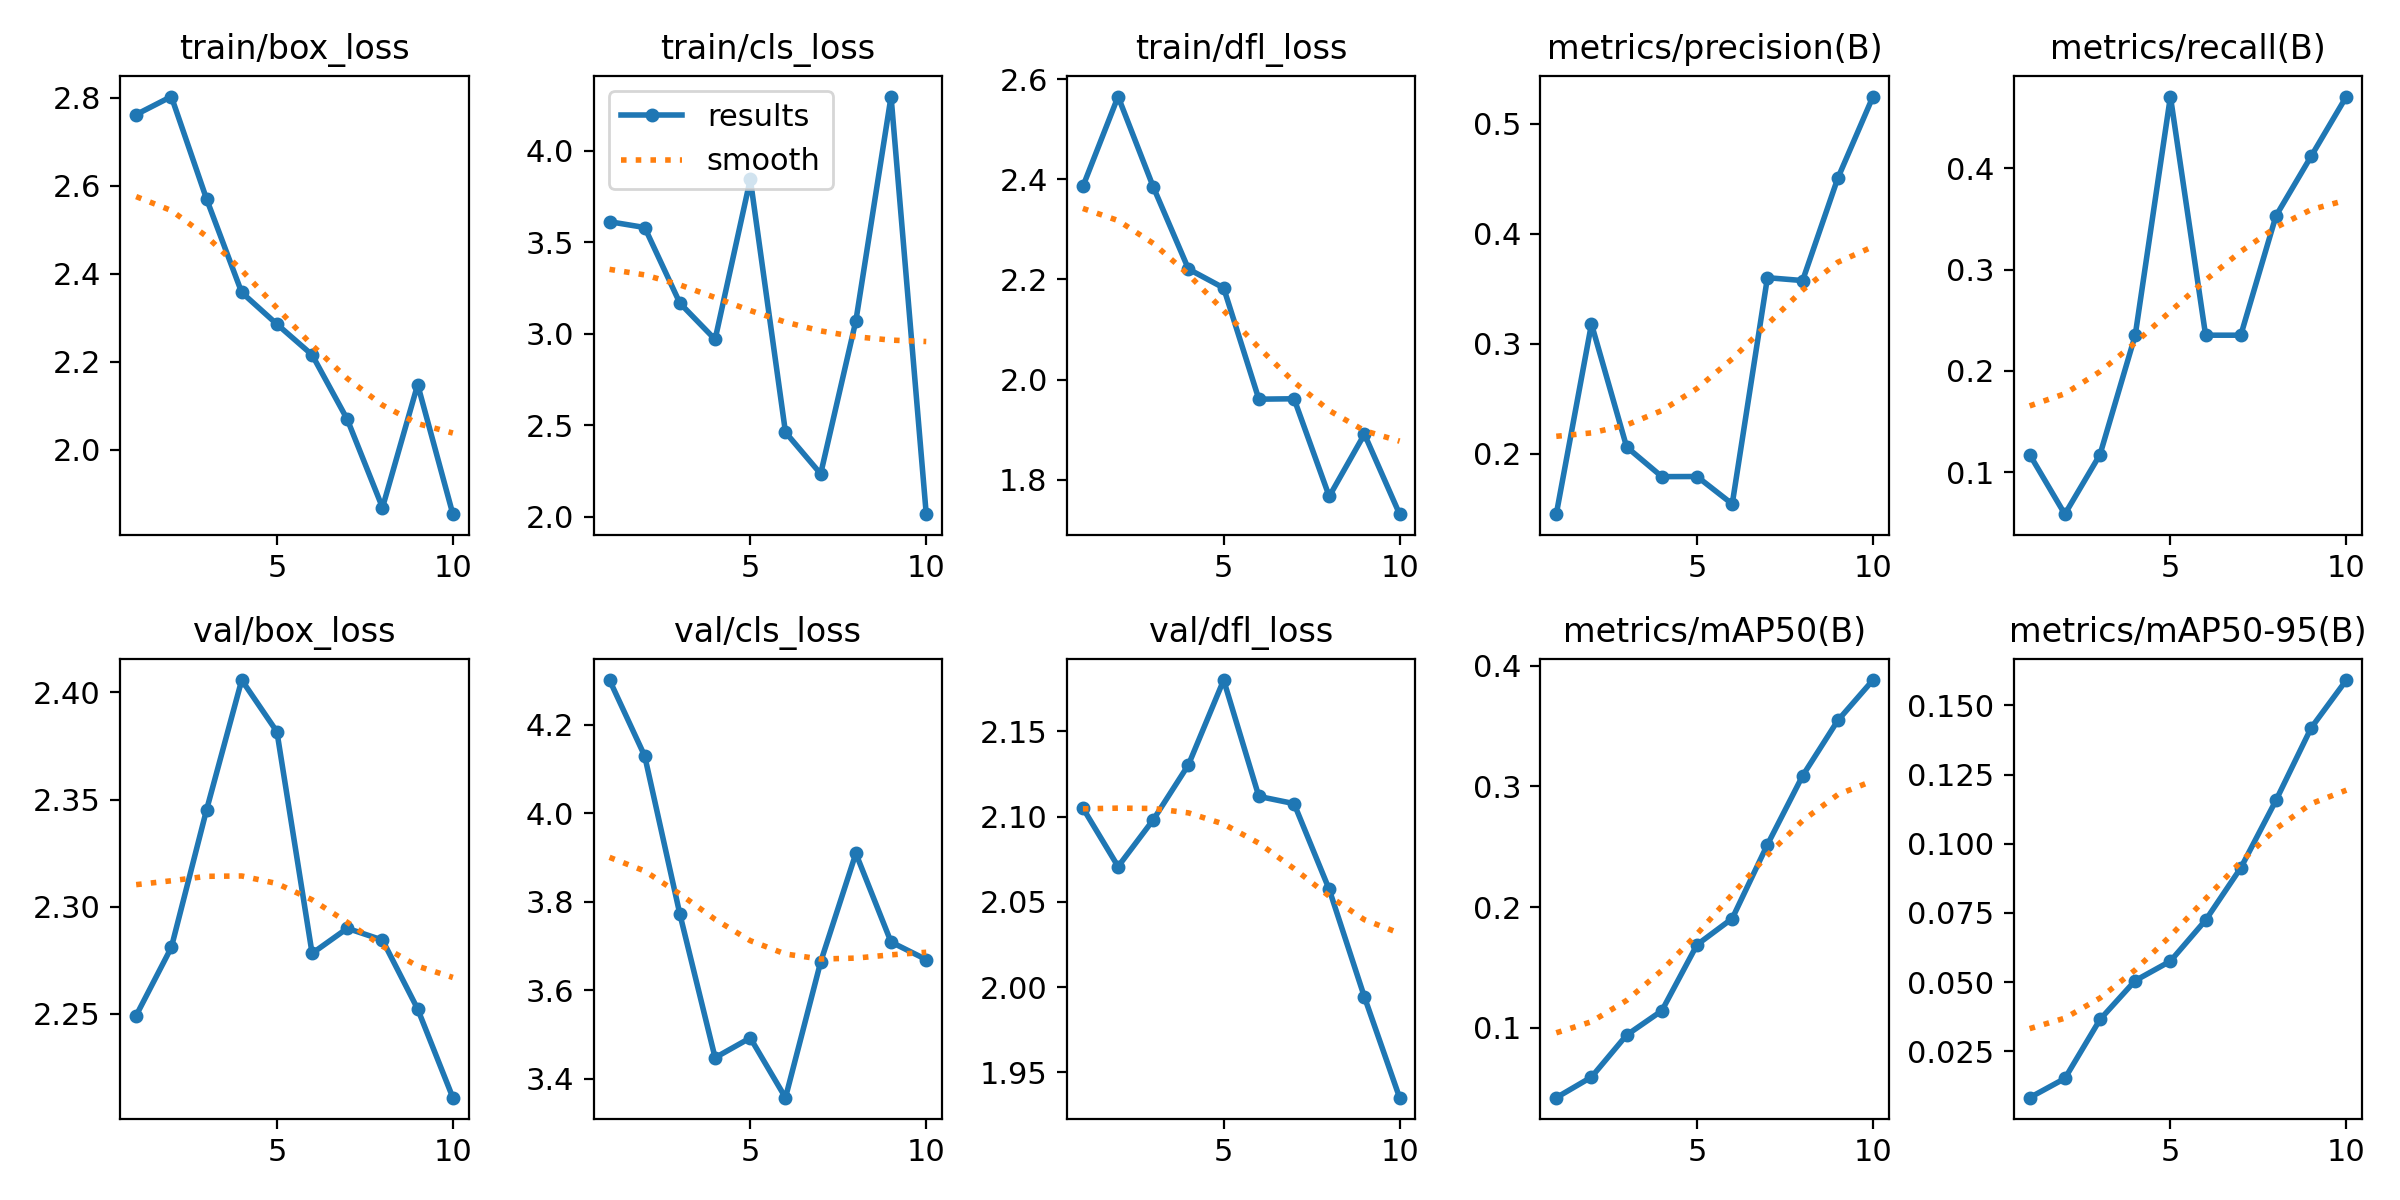

In [ ]:
IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

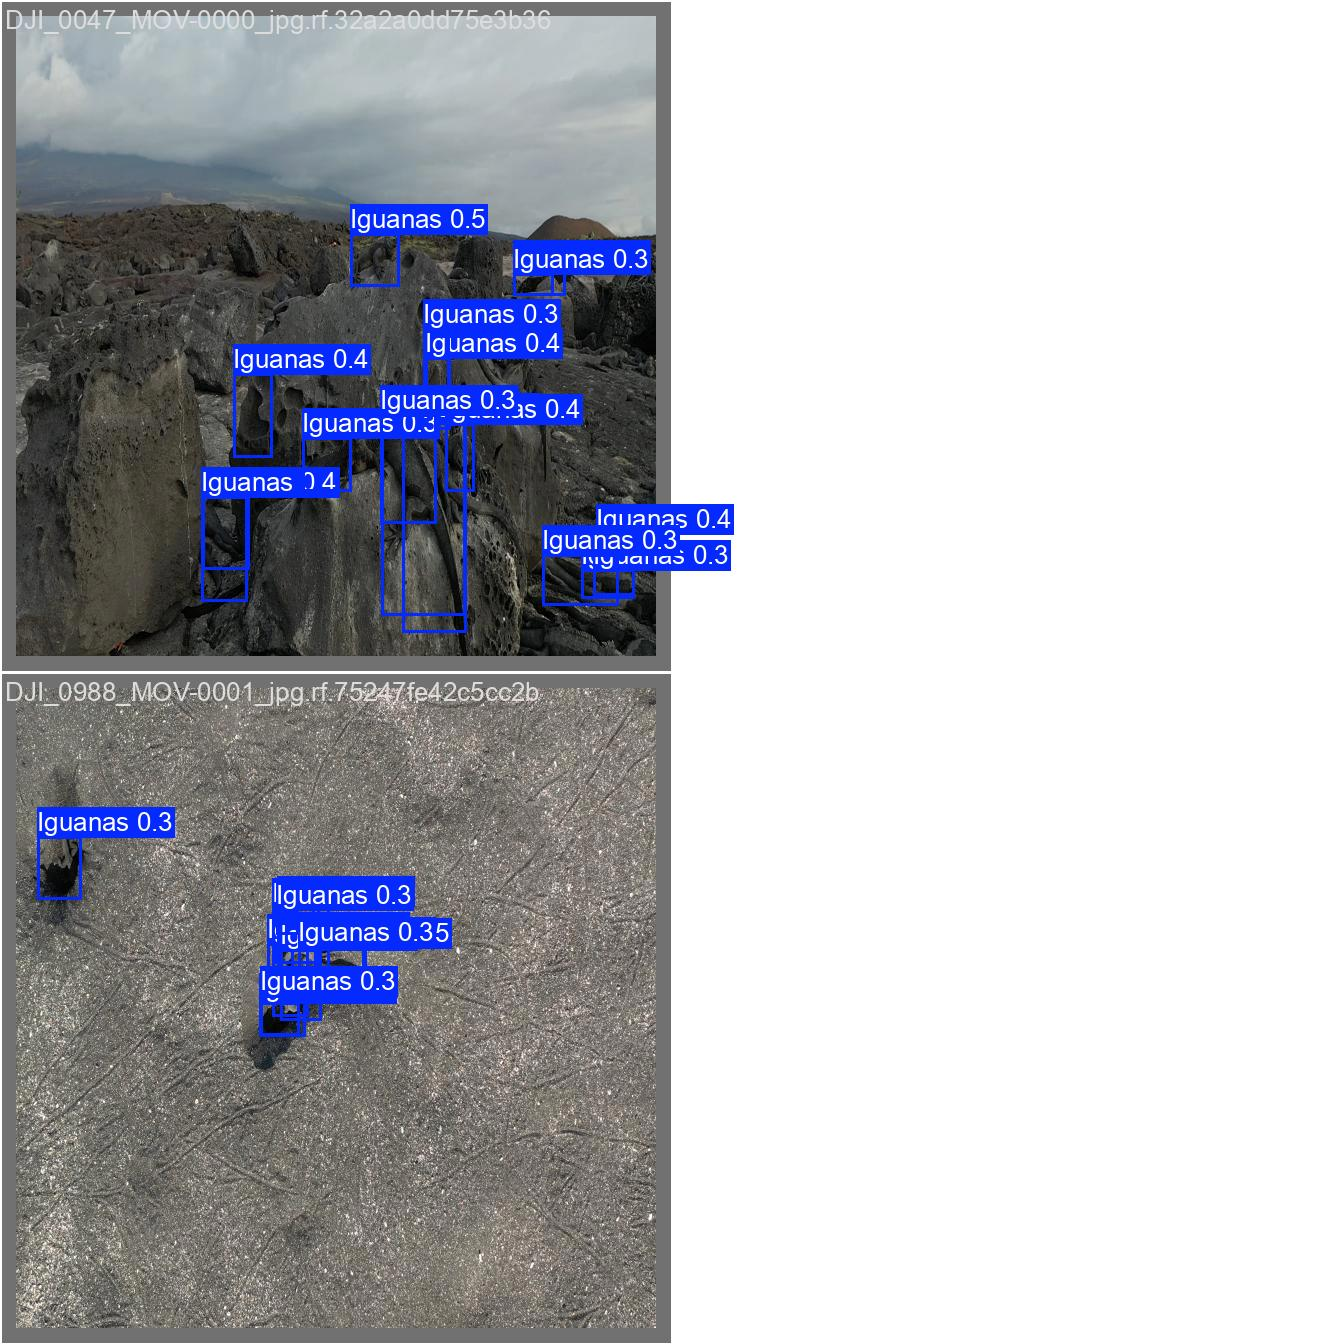

In [ ]:
IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

### Validate fine-tuned model

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.15 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/Galapagos-3/valid/labels.cache... 2 images, 0 backgrounds, 0 corrupt: 100% 2/2 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:02<00:00,  2.48s/it]
                   all          2         17      0.525      0.471      0.388       0.16
Speed: 20.1ms preprocess, 1008.8ms inference, 0.0ms loss, 173.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


### Inference with custom model

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.15 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/2 /content/datasets/Galapagos-3/test/images/DJI_0485_MOV-0000_jpg.rf.78ba6f1838311513ab4a019a2d572e97.jpg: 640x640 94 Iguanass, 15.6ms
image 2/2 /content/datasets/Galapagos-3/test/images/gal_PNG.rf.9b95a93afb97d7cb18c87c5f2ca7ceb0.jpg: 640x640 5 Iguanass, 15.6ms
Speed: 2.7ms preprocess, 15.6ms inference, 290.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


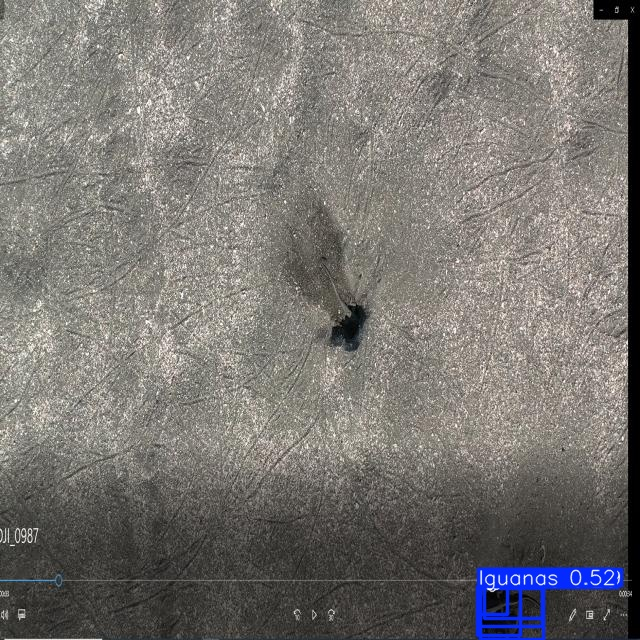

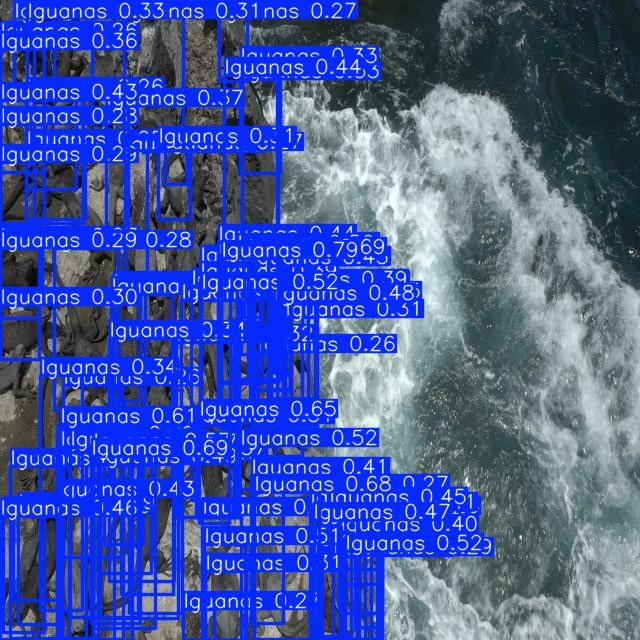

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

### Deploy model on Roboflow

In [ ]:
project.version(dataset.version).deploy(model_type="yolov11", model_path=f"{HOME}/runs/detect/train/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


Running inference on DJI_0485_MOV-0000_jpg.rf.78ba6f1838311513ab4a019a2d572e97.jpg


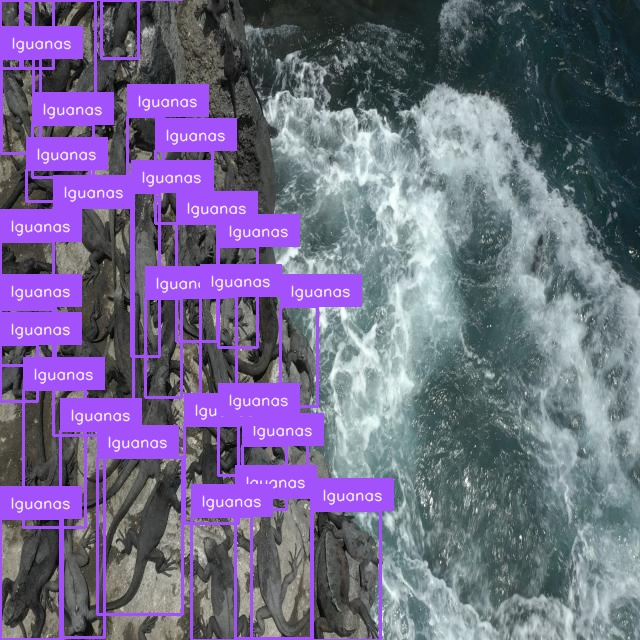

Running inference on gal_PNG.rf.9b95a93afb97d7cb18c87c5f2ca7ceb0.jpg


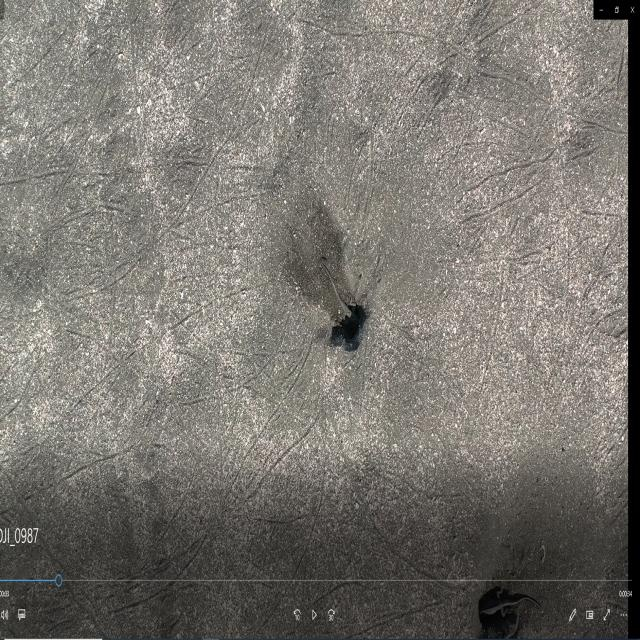

In [ ]:
import os, random, cv2
import supervision as sv
import IPython
import inference

model_id = project.id.split("/")[1] + "/" + dataset.version
model = inference.get_model(model_id, userdata.get('ROBOFLOW_API_KEY'))

# Location of test set images
test_set_loc = dataset.location + "/test/images/"
test_images = os.listdir(test_set_loc)

# Run inference on 4 random test images, or fewer if fewer images are available
for img_name in random.sample(test_images, min(4, len(test_images))):
    print("Running inference on " + img_name)

    # Load image
    image = cv2.imread(os.path.join(test_set_loc, img_name))

    # Perform inference
    results = model.infer(image, confidence=0.4, overlap=30)[0]
    detections = sv.Detections.from_inference(results)

    # Annotate boxes and labels
    box_annotator = sv.BoxAnnotator()
    label_annotator = sv.LabelAnnotator()
    annotated_image = box_annotator.annotate(scene=image, detections=detections)
    annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

    # Display annotated image
    _, ret = cv2.imencode('.jpg', annotated_image)
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)


## Avance de la semana 3

### Asignación:
- Miguel Andrés Realpe Robalino: usar modelos de segmentación semántica por instancias, frames de alta resolución y aumento para labeling poligonal con vista aérea de 90' para la geolocalización y rastreo de iguanas

### Tareas Completadas
- [ ] Escoger frames con vista aérea de 90'
- [ ] Mejorar el dataset de iguanas con labeling poligonal
- [ ] Uso de modelos de segmentación semántica
- [ ] Link al dataset, github y al deployed model

### Desafíos Enfrentados
- Falta de frames útiles con vista aérea de 90'
- Soluciones: aumentar la data tal vez con imágenes de internet

### Próximos Pasos
- Por asignar

In [ ]:
project = rf.workspace("geckos-land").project("galapagos-oxbrc")
version = project.version(4)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
%cd {HOME}
!yolo task=segment mode=train model=yolov8s-seg.pt  data={dataset.location}/data.yaml epochs=10 imgsz=640

/content
Ultralytics 8.3.22 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/Galapagos-4/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

/content


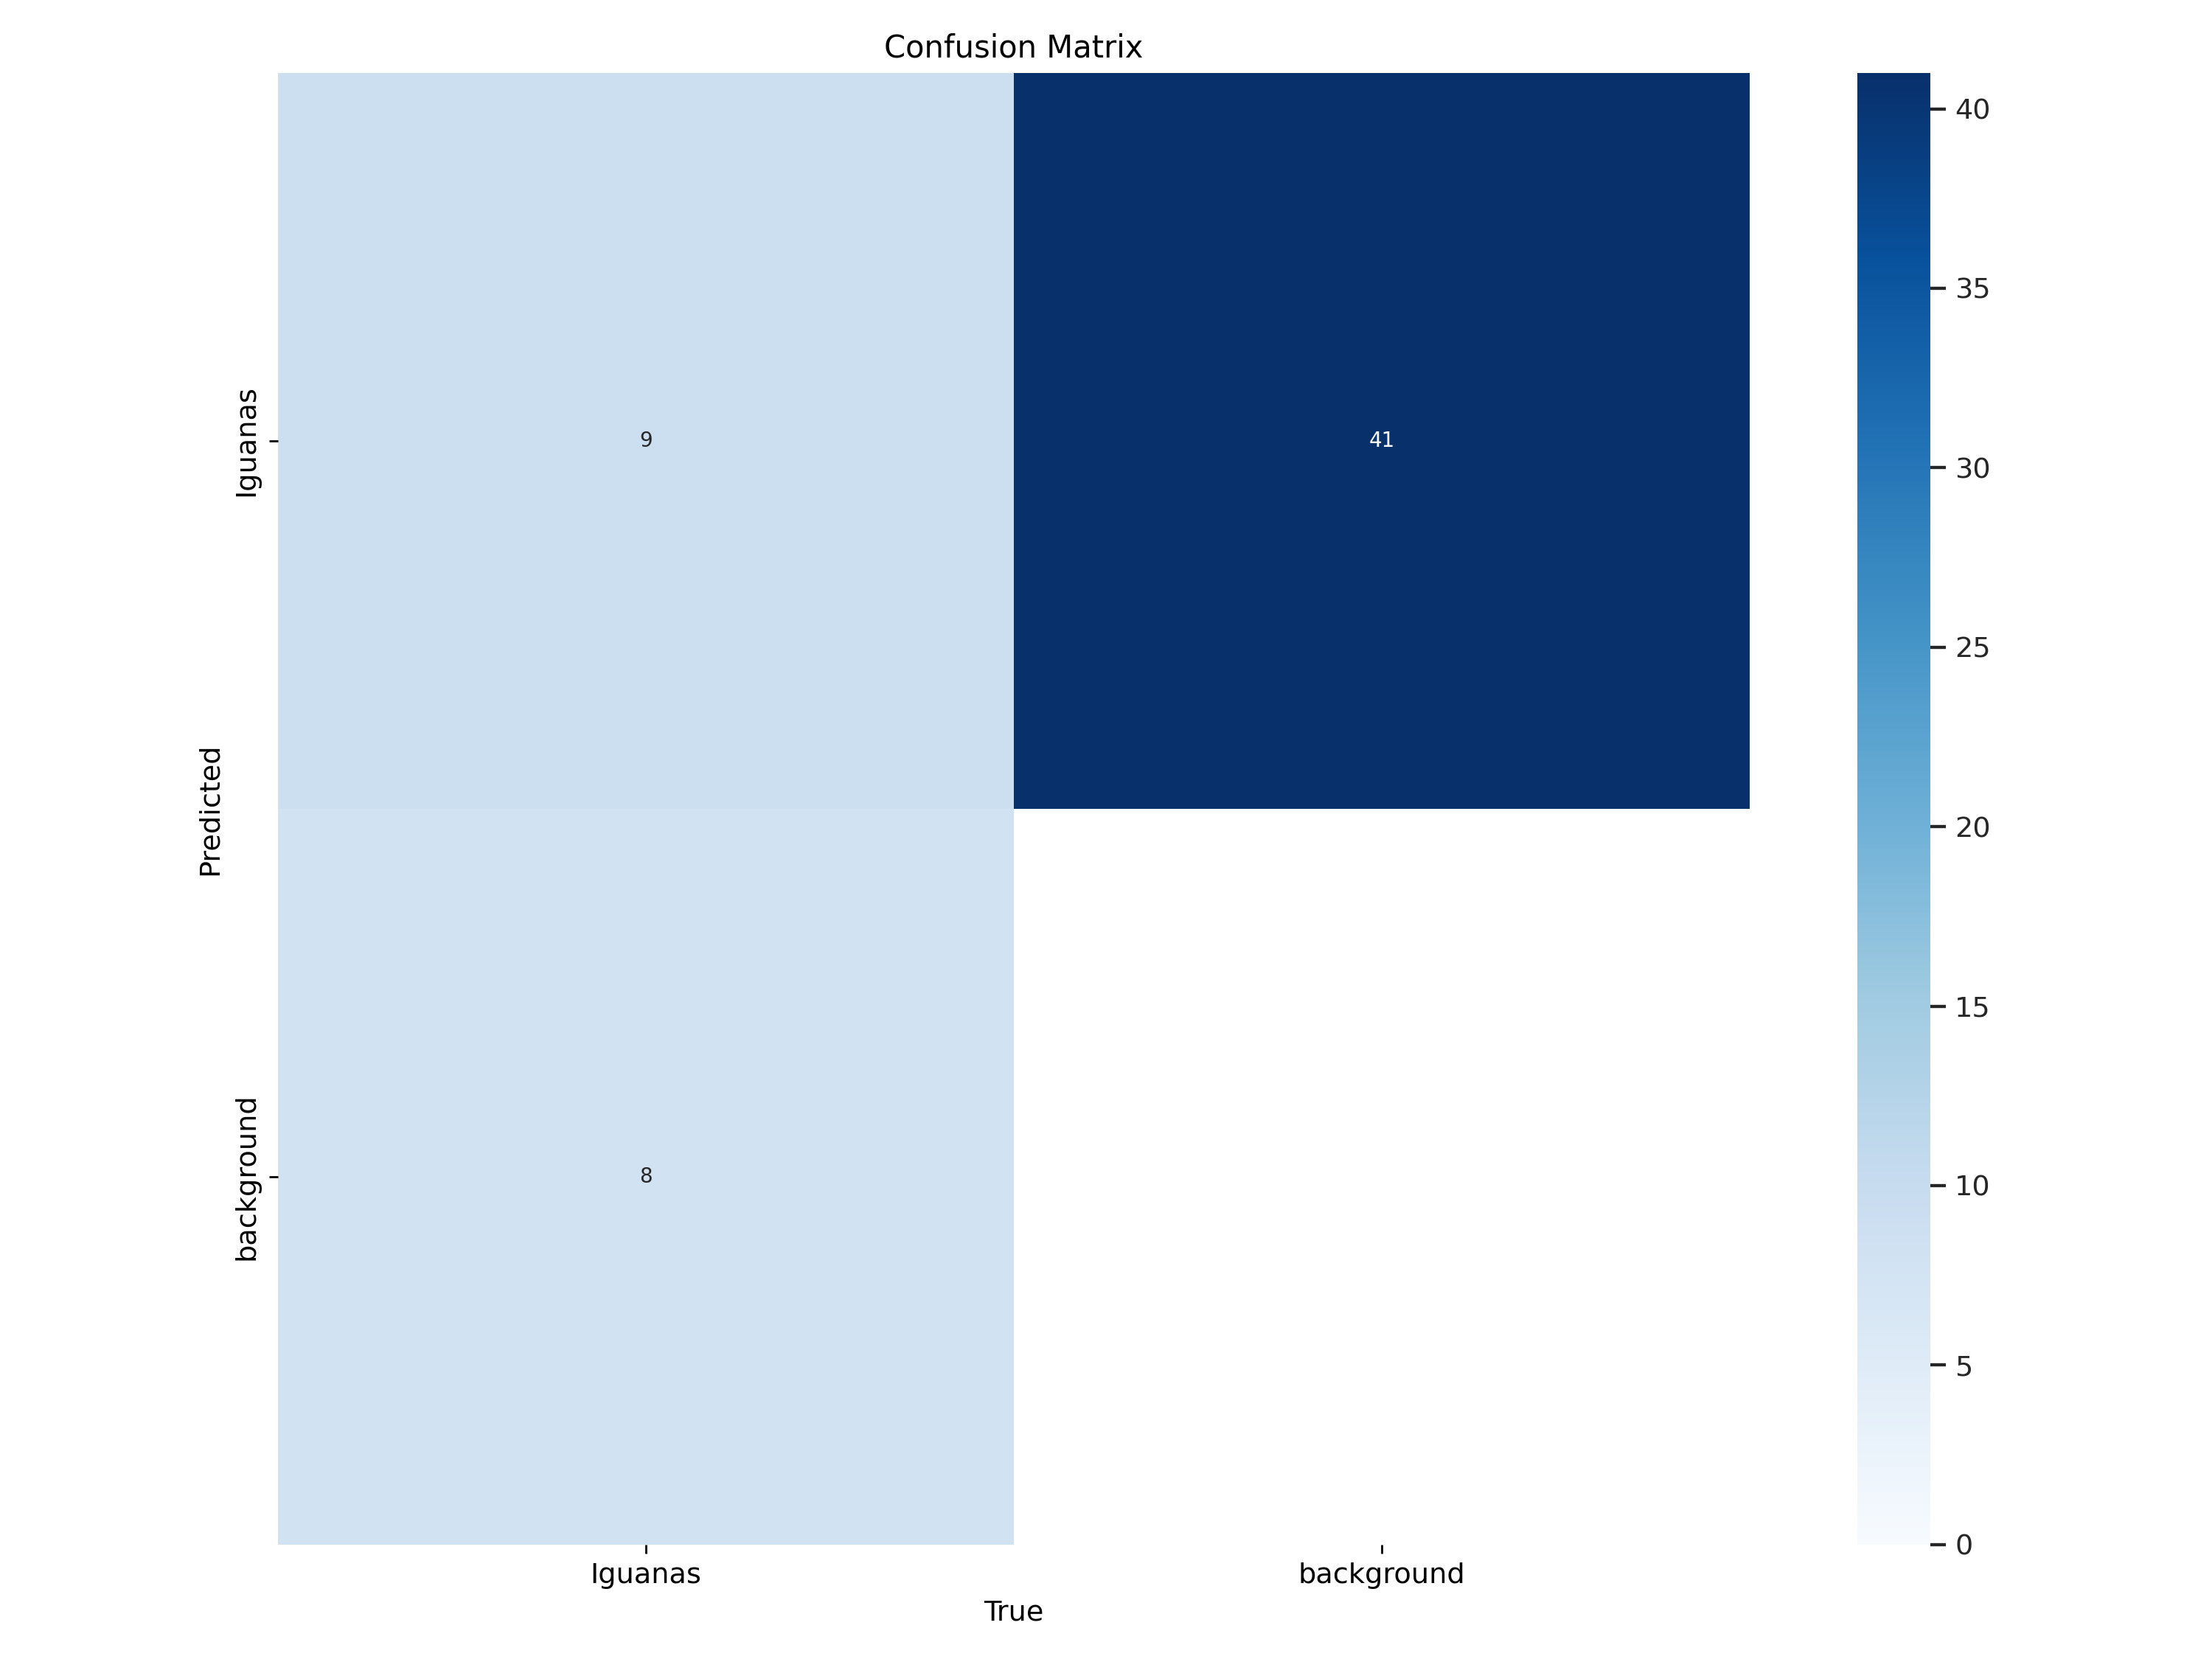

In [ ]:
%cd {HOME}
IPyImage(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

/content


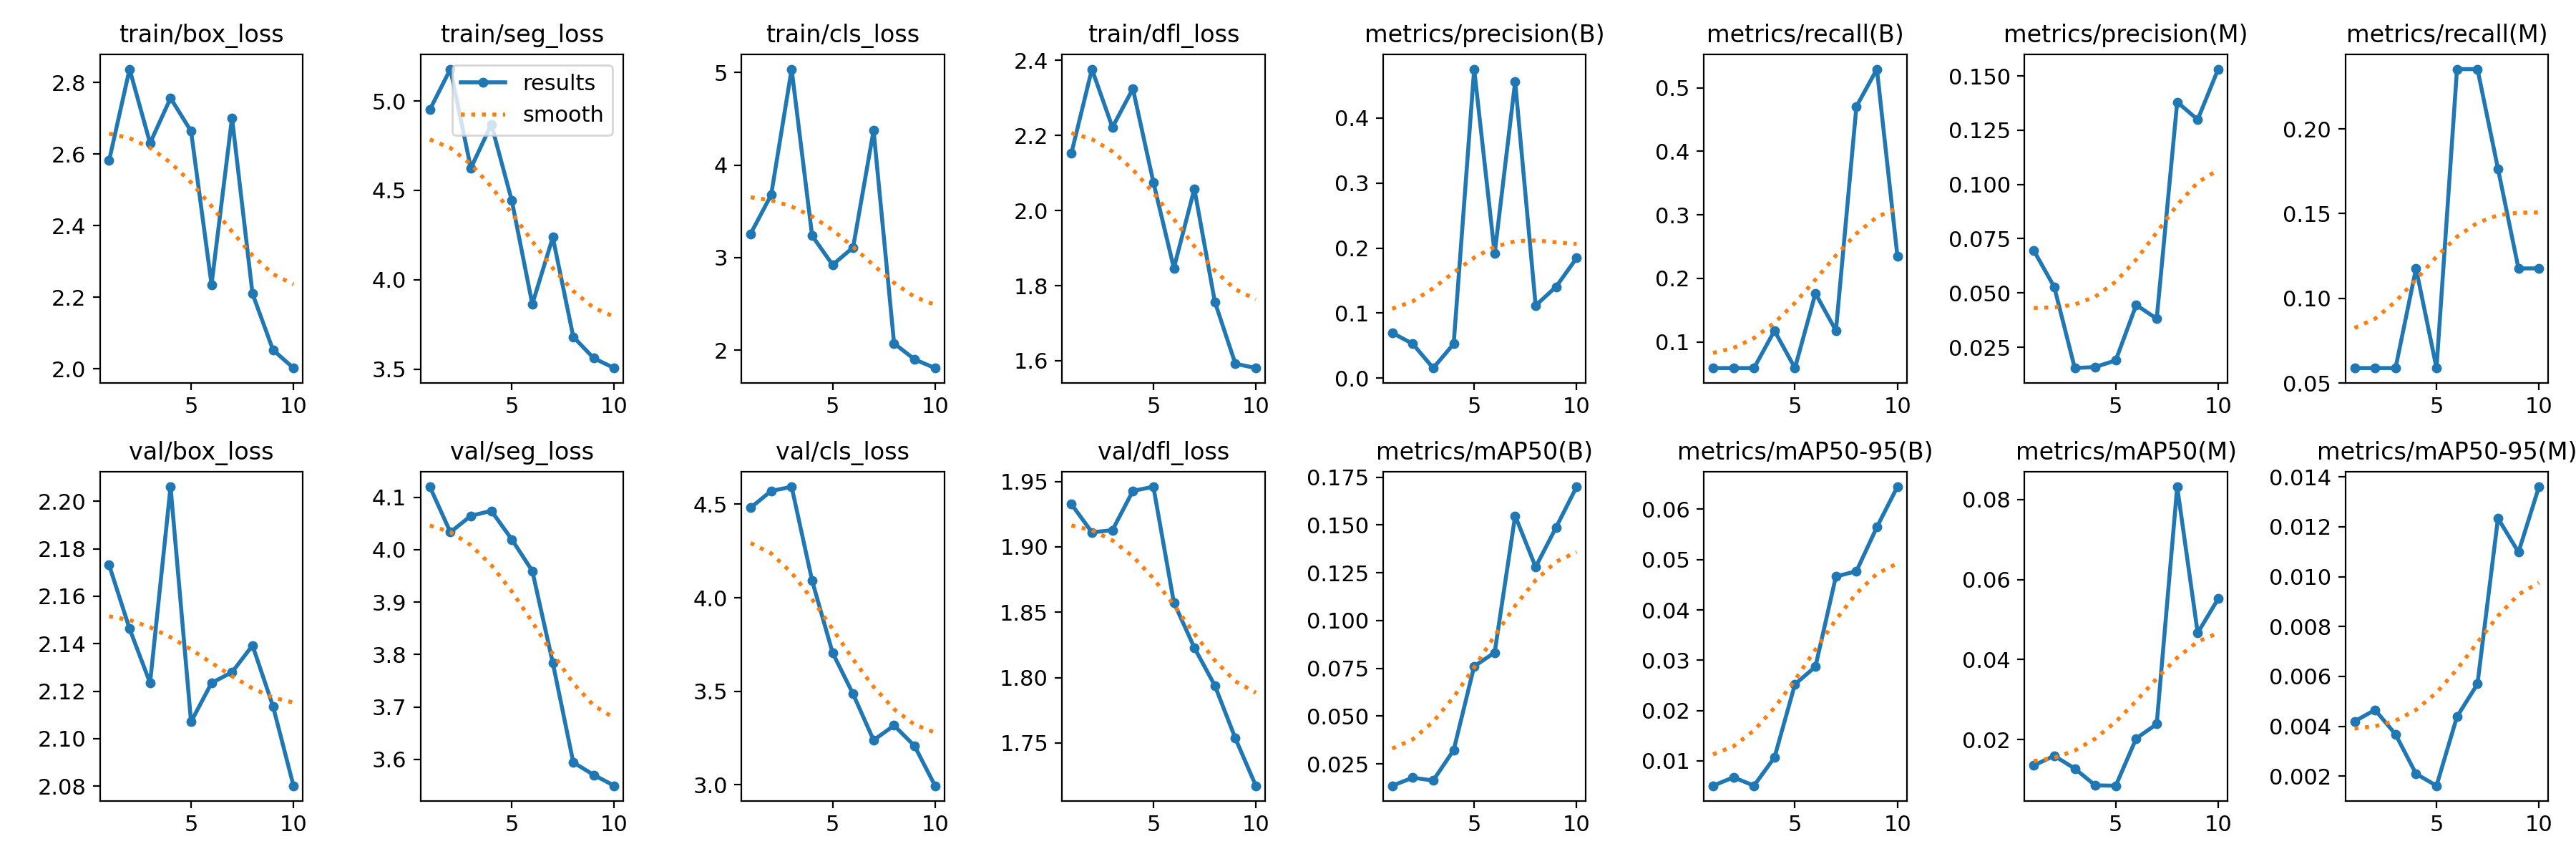

In [ ]:
%cd {HOME}
IPyImage(filename=f'{HOME}/runs/segment/train/results.png', width=600)

/content


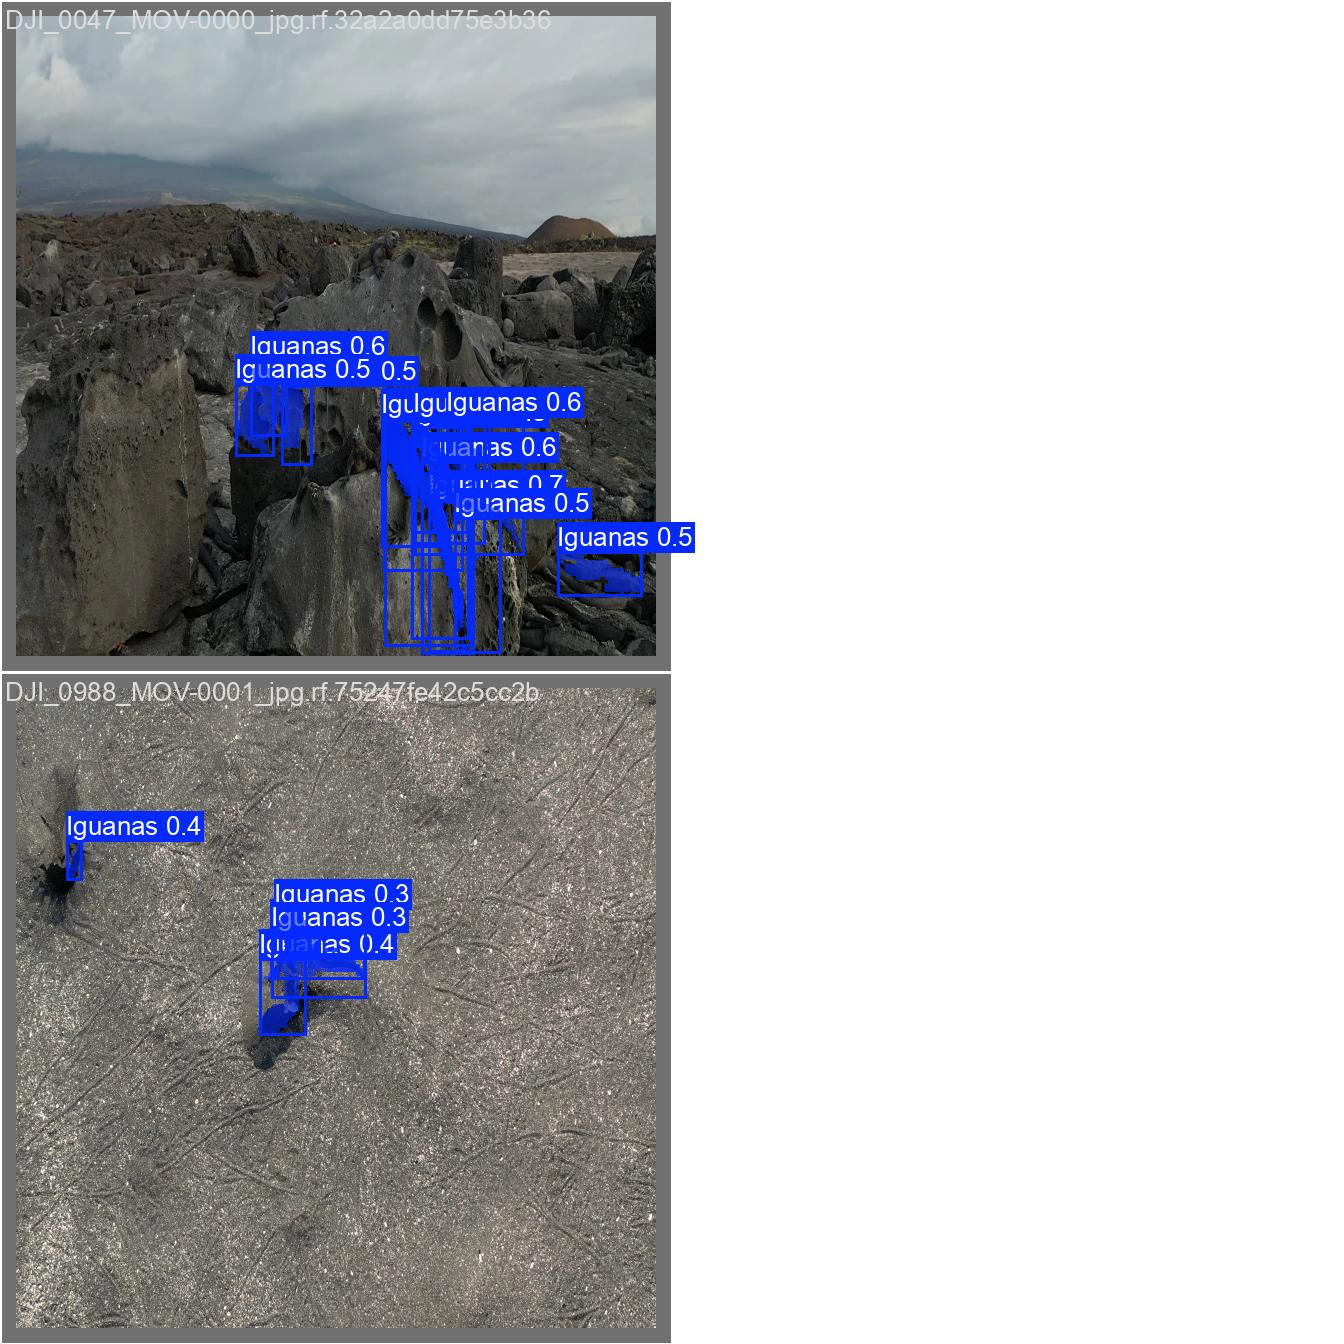

In [ ]:
%cd {HOME}
IPyImage(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics 8.3.22 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,779,987 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/datasets/Galapagos-4/valid/labels.cache... 6 images, 0 backgrounds, 0 corrupt: 100% 6/6 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.03it/s]
                   all          6        217      0.134     0.0553     0.0402     0.0157     0.0389      0.323     0.0301     0.0116
Speed: 0.3ms preprocess, 37.9ms inference, 0.0ms loss, 90.9ms postprocess per image
Results saved to runs/segment/val4
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content
Ultralytics 8.3.22 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,779,987 parameters, 0 gradients, 42.4 GFLOPs

image 1/3 /content/datasets/Galapagos-4/test/images/DJI_0010_MOV-0010_jpg.rf.a27cf013b66830ef0b16fa1f3731c29a.jpg: 640x640 (no detections), 24.3ms
image 2/3 /content/datasets/Galapagos-4/test/images/DJI_0485_MOV-0000_jpg.rf.78ba6f1838311513ab4a019a2d572e97.jpg: 640x640 73 Iguanass, 24.8ms
image 3/3 /content/datasets/Galapagos-4/test/images/gal_PNG.rf.9b95a93afb97d7cb18c87c5f2ca7ceb0.jpg: 640x640 2 Iguanass, 20.9ms
Speed: 3.7ms preprocess, 23.3ms inference, 322.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


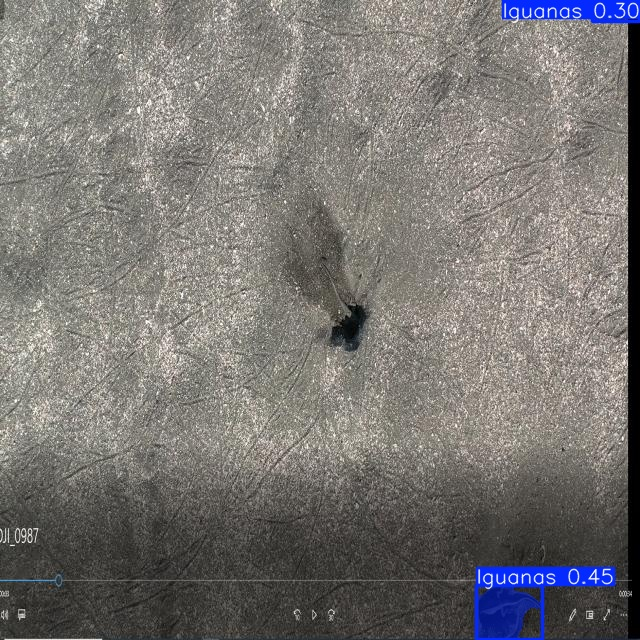

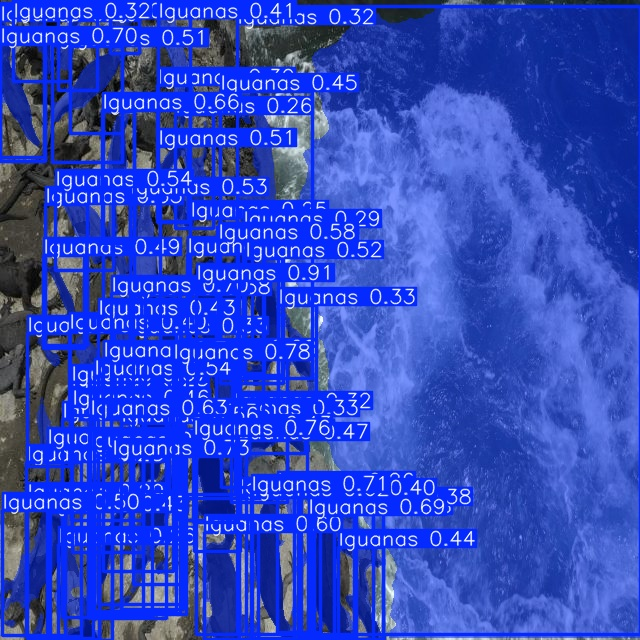

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8-seg", model_path=f"{HOME}/runs/segment/train/")

Dependency ultralytics==8.0.196 is required but found version=8.3.22, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/geckos-land/galapagos-oxbrc/4
Share your model with the world at: https://universe.roboflow.com/geckos-land/galapagos-oxbrc/model/4


## Avance de la semana 4 y 5

### Asignación:
- Miguel Andrés Realpe Robalino: usar modelos de segmentación semántica por instancias, frames de alta resolución y aumento para labeling poligonal con vista aérea de 90' para la geolocalización y rastreo de iguanas. Entrenar el modelo con más epochs y mejor dataset. Investigar uso de suelo.

### Tareas Completadas
- [x] Escoger frames con vista aérea de 90'
- [x] Mejorar el dataset de iguanas con labeling poligonal
- [x] Uso de modelos de segmentación semántica
- [ ] Link al dataset, github y al deployed model
- [ ] Uso de modelos para el suelo


### Desafíos Enfrentados
- Falta de frames útiles con vista aérea de 90'
- Falta de luz
- Muy lento el labeling


In [8]:
project = rf.workspace("geckos-land").project("galapagosiguanas")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to GalapagosIguanas-1 in yolov11:: 100%|██████████| 130/130 [00:00<00:00, 1318.36it/s]


In [9]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s-seg.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

/content
100% 19.7M/19.7M [00:00<00:00, 179MB/s]
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolo11s-seg.pt, data=/content/datasets/GalapagosIguanas-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualiz

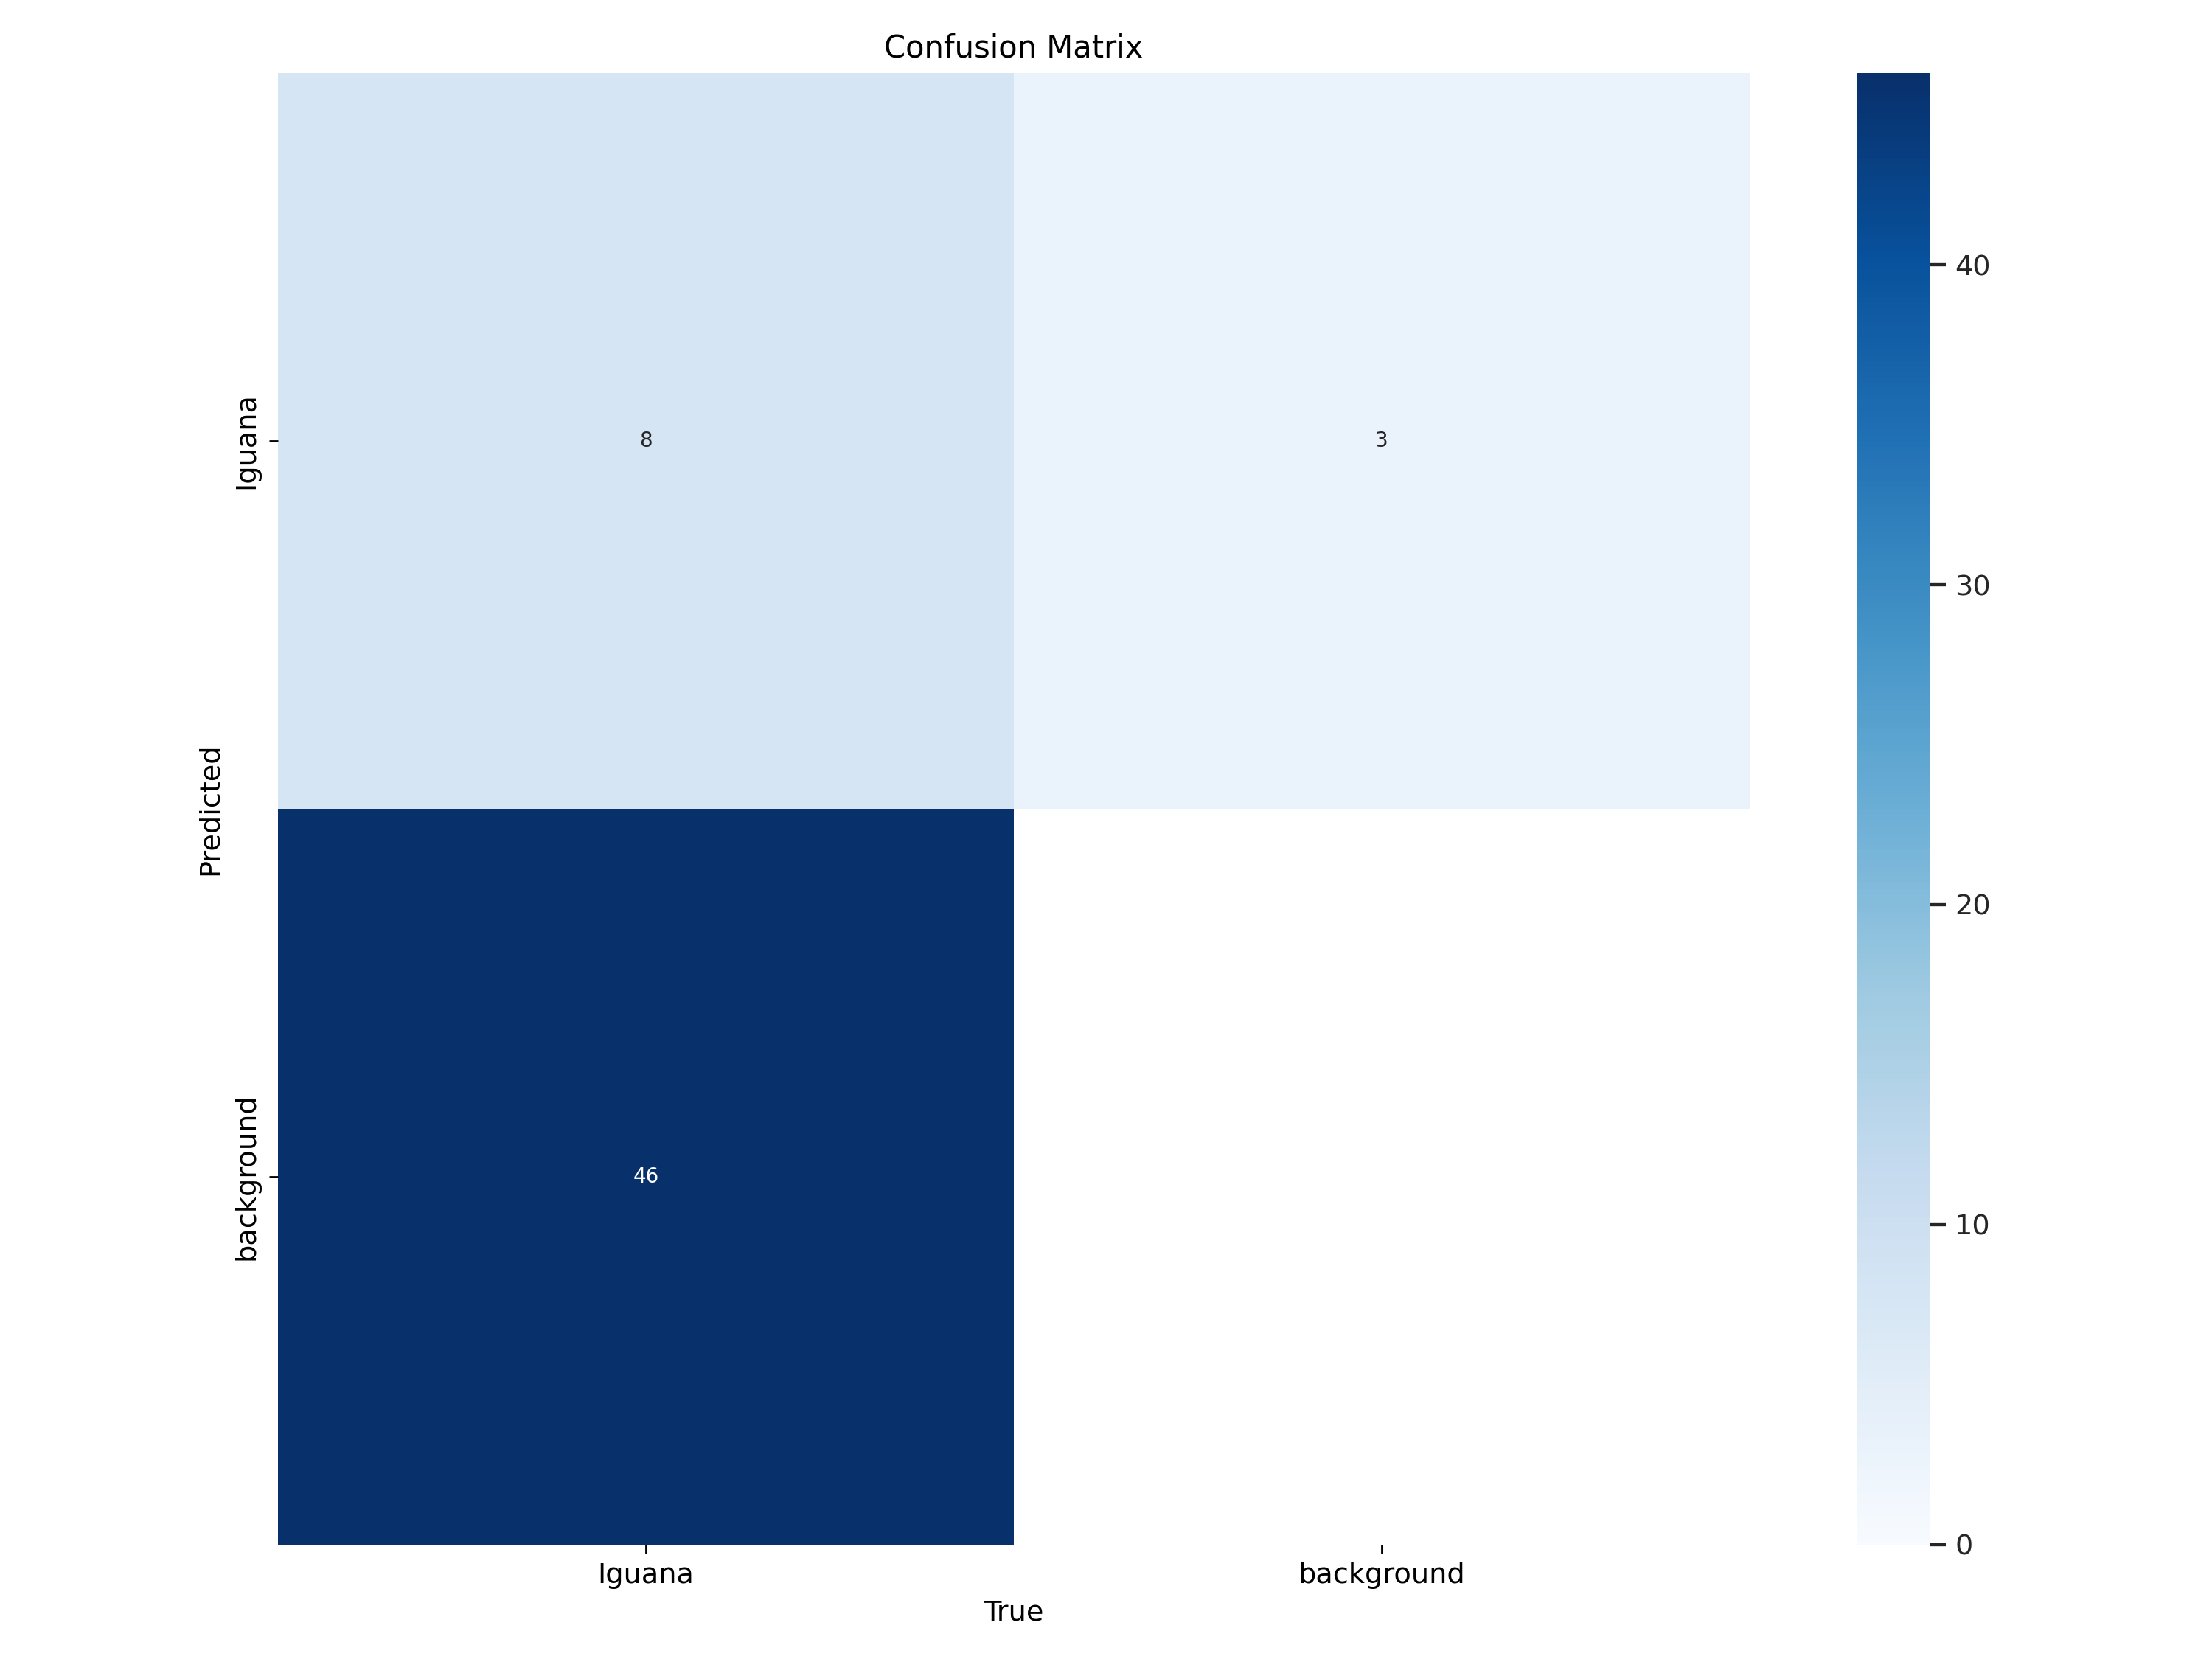

In [10]:
IPyImage(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

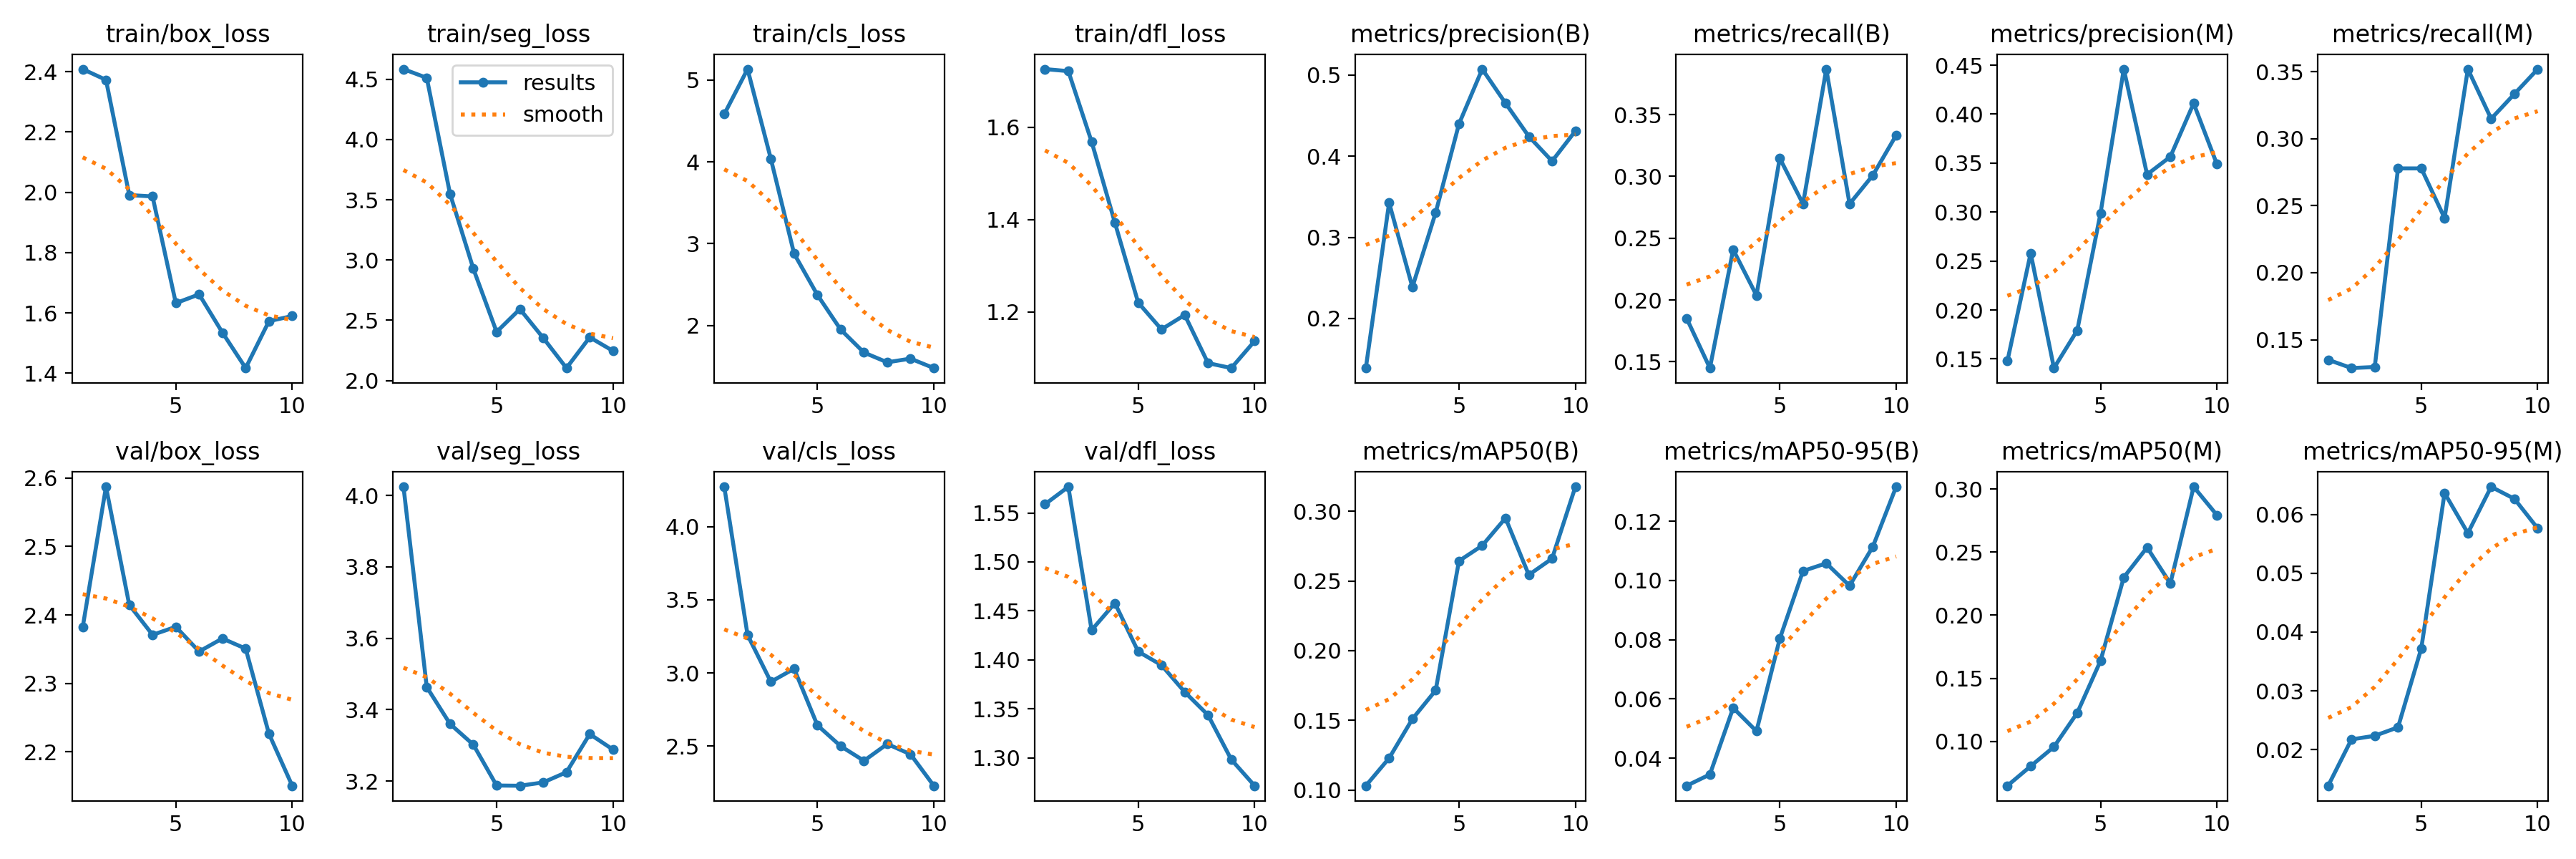

In [11]:
IPyImage(filename=f'{HOME}/runs/segment/train/results.png', width=600)

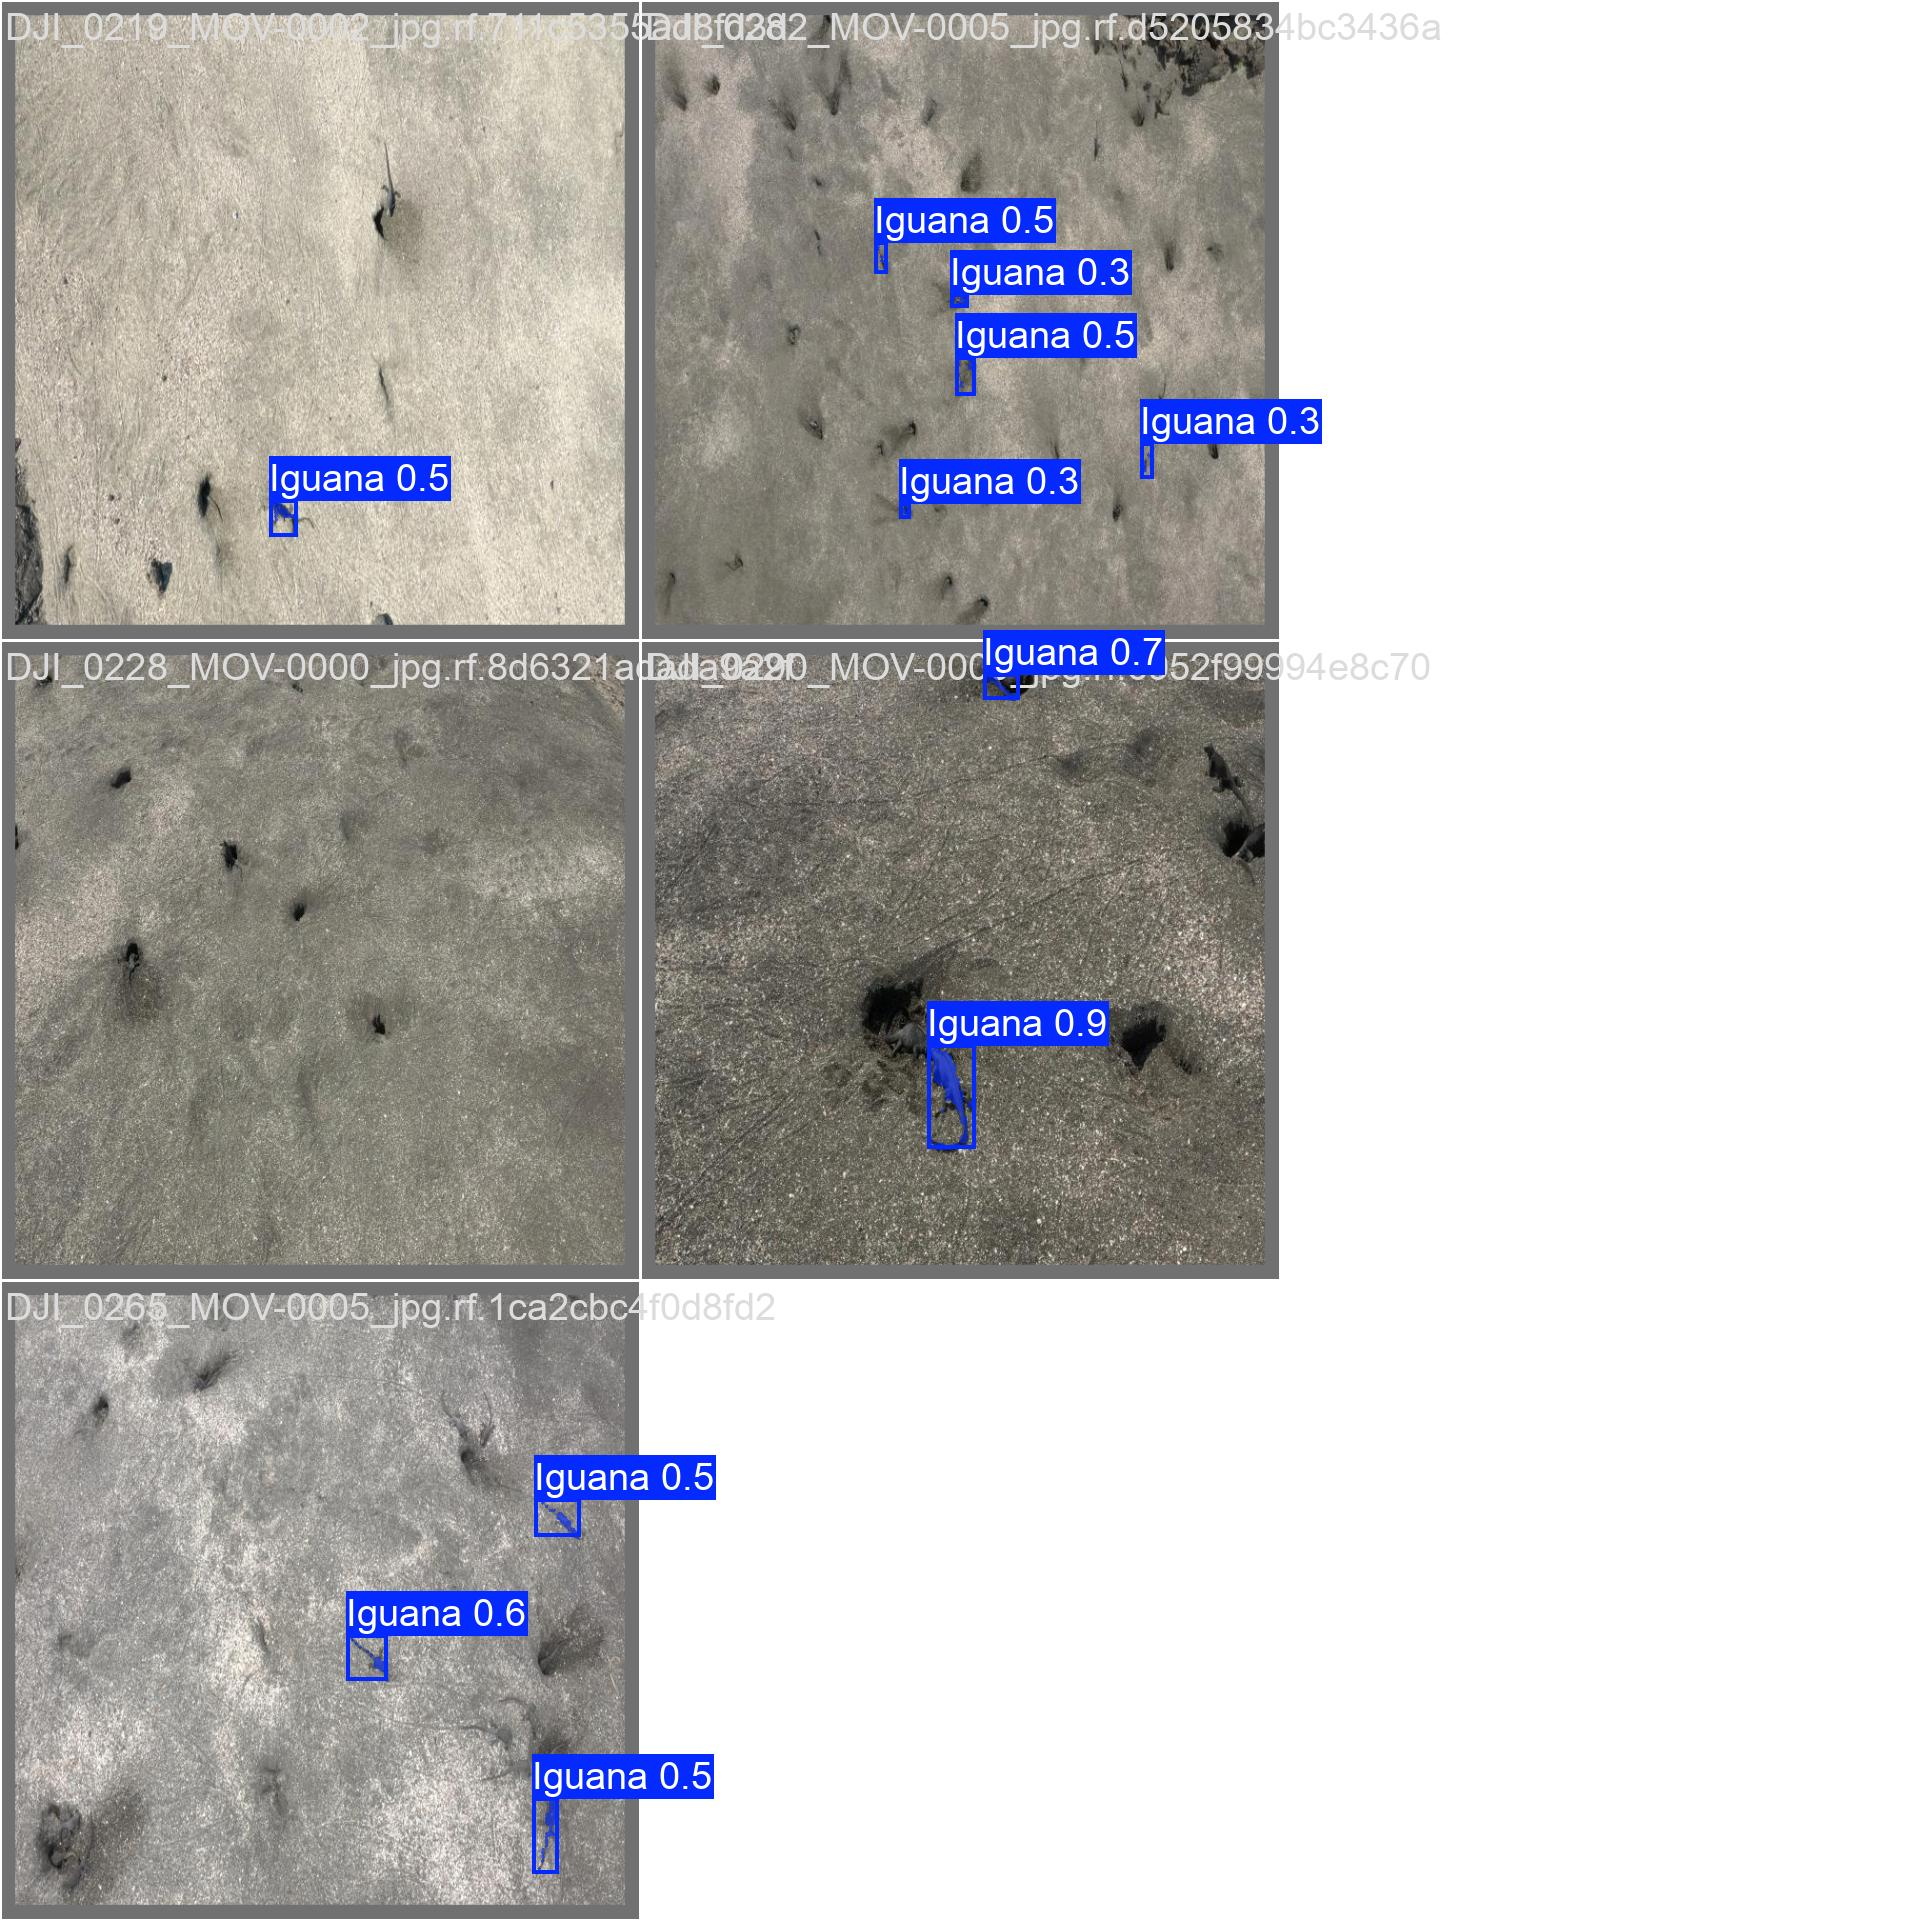

In [12]:
IPyImage(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

In [13]:
!yolo task=detect mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs
val: Scanning /content/datasets/GalapagosIguanas-1/valid/labels.cache... 5 images, 0 backgrounds, 0 corrupt: 100% 5/5 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.14it/s]
                   all          5         54      0.484       0.33       0.32      0.128      0.317      0.318      0.272     0.0562
Speed: 0.5ms preprocess, 31.6ms inference, 0.0ms loss, 112.7ms postprocess per image
Results saved to runs/segment/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [14]:
!yolo task=detect mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs

image 1/3 /content/datasets/GalapagosIguanas-1/test/images/DJI_0265_MOV-0004_jpg.rf.8c55de2390722f7060e52b9fa7dd270a.jpg: 640x640 2 Iguanas, 20.2ms
image 2/3 /content/datasets/GalapagosIguanas-1/test/images/DJI_0282_MOV-0004_jpg.rf.16388ec160f464eaab3013907c68df36.jpg: 640x640 8 Iguanas, 20.3ms
image 3/3 /content/datasets/GalapagosIguanas-1/test/images/DJI_0290_MOV-0002_jpg.rf.93cde8c5d16f7d29642257795e119168.jpg: 640x640 4 Iguanas, 20.1ms
Speed: 2.3ms preprocess, 20.2ms inference, 210.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


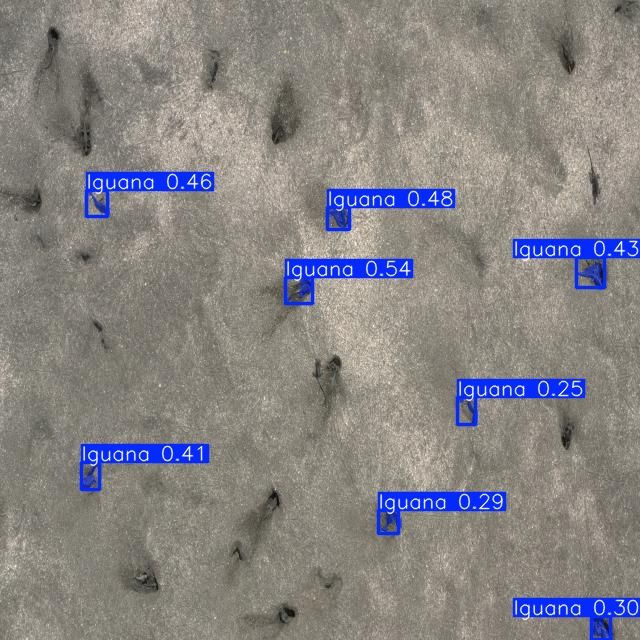

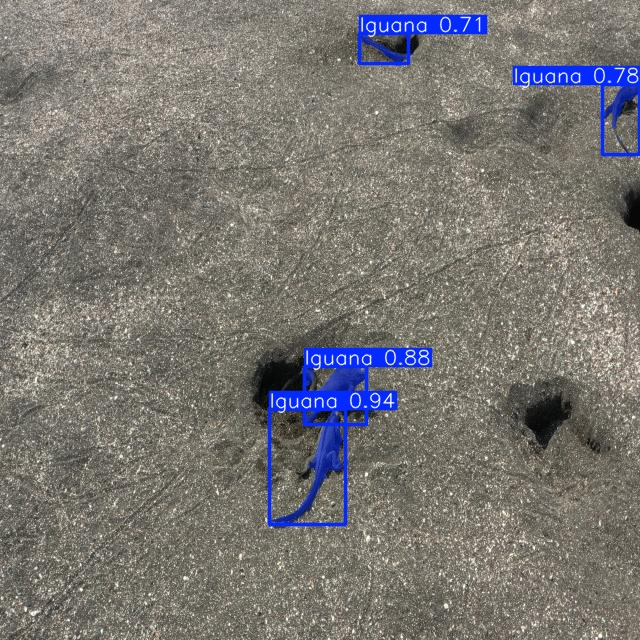

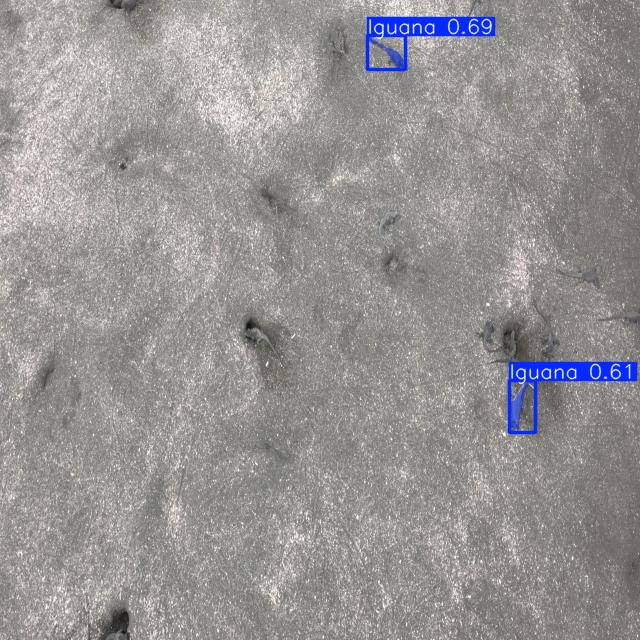

In [15]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/segment/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

### References
1. Roboflow. (2024). *Roboflow Notebooks: How to Train YOLO11 Object Detection on a Custom Dataset*. Retrieved from https://github.com/roboflow/notebooks/blob/main/notebooks/train-yolo11-object-detection-on-custom-dataset.ipynb
2. Roboflow. (). *Roboflow Notebooks: How to Train YOLO8 Instance Segmentation on a Custom Dataset* Retrieved from https://blog.roboflow.com/how-to-train-yolov8-instance-segmentation/
3. Roboflow. (). *Roboflow Notebooks: How to Train YOLO11 Instance Segmentation on a Custom Dataset* Retrieved from https://github.com/roboflow/notebooks/blob/main/notebooks/train-yolo11-instance-segmentation-on-custom-dataset.ipynb
3. Ultralytics. (). *Model Training with Ultralytics YOLO* Retrieved from https://docs.ultralytics.com/modes/train/